In [35]:
!pip install seqeval

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [36]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [37]:
import os
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import LabelEncoder
import nltk
import re
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, f1_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from nltk.stem import WordNetLemmatizer
import itertools
from wordcloud import WordCloud
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from keras.models import Sequential,Model
from keras.layers import Dense,LSTM, SpatialDropout1D, Embedding
from keras.utils.np_utils import to_categorical
from joblib import dump, load

In [38]:
text = []
clas = []
df = pd.read_csv('/content/drive/MyDrive/Hindi AD/new_Manual_dataset.csv',dtype = "str")
df
text = df['opus-mt'].tolist()
clas = df['Labels'].tolist()

df = pd.DataFrame({'tweet': text, 'class': clas})

In [39]:
df

,tweet,class
0,यह दृश्‍य किचिन में है । एक लड़का एक घड़े से क...,0
1,ओह मैं सिंक खत्म हो रहा है देखते हैं. मुझे लगत...,0
2,एक लड़का और लड़की रसोई में अपनी माँ के साथ हैं...,0
3,ठीक है. गर्मियों का मौसम था और माँ और बच्चे रस...,0
4,"मैं पर मेरे चश्मा डाल जब तक इंतजार करें. ओह, ए...",0
...,...,...
543,छोटा बच्चा अपनी चौकी से गिर रहा है. और वह (बस्...,1
544,mh. अच्छी तरह से इस आदमी कुकी जार में है. और व...,1
545,छोटे लड़के को उस चौकी पर है जिस पर सरकना है और...,1
546,ओह तुम मुझे तुम्हें बताने के लिए चाहते हैं. मा...,1


# text cleaning

In [40]:
df['tweet'] = df[['tweet']].apply(lambda x: x.str.strip()).replace('', np.nan)
df = df.dropna(subset=['tweet'])
df.reset_index(drop=True, inplace=True)

In [41]:
df['tweet'] = df['tweet'].apply(lambda x:x.lower())

In [42]:
punctuation_signs = list("?:!.,;|।")
df['tweet'] = df['tweet']

for punct_sign in punctuation_signs:   
    df['tweet'] = df['tweet'].str.replace(punct_sign, '')

<ipython-input-42-58185447e27a>:5: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  df['tweet'] = df['tweet'].str.replace(punct_sign, '')


In [43]:
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\n', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('\t', ' '))
df['tweet'] = df['tweet'].apply(lambda x: x.replace('।', ' '))
df['tweet'] = df['tweet'].str.replace("    ", " ")
df['tweet'] = df['tweet'].str.replace('"', '')
df['tweet'] = df['tweet'].str.replace("'s", "")

In [44]:
nltk.download('stopwords')
stop_words = list(stopwords.words('english'))
for stop_word in stop_words:
    regex_stopword = r"\b" + stop_word + r"\b"
    df['tweet'] = df['tweet'].str.replace(regex_stopword, '')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
<ipython-input-44-969333b8111c>:5: FutureWarning: The default value of regex will change from True to False in a future version.
  df['tweet'] = df['tweet'].str.replace(regex_stopword, '')


In [45]:
import re
Tweet = []
for tweettext in df["tweet"]:
  text = re.sub(r"http\S+", "", tweettext)
  text = re.sub(r"@\S+"," ",text)
  emoji_pattern = re.compile("["
                            u"\U0001F600-\U0001F64F"  # emoticons
                            u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                            u"\U0001F680-\U0001F6FF"  # transport & map symbols
                            u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                            u"\U00002500-\U00002BEF"  # chinese char
                            u"\U00002702-\U000027B0"
                            u"\U00002702-\U000027B0"
                            u"\U000024C2-\U0001F251"
                            u"\U0001f926-\U0001f937"
                            u"\U00010000-\U0010ffff"
                            u"\u2640-\u2642"
                            u"\u2600-\u2B55"
                            u"\u200d"
                            u"\u23cf"
                            u"\u23e9"
                            u"\u231a"
                            u"\ufe0f"  # dingbats
                            u"\u3030"
                            "]+", flags=re.UNICODE)

  text = emoji_pattern.sub('',text)
  text = text.replace("#","")
  text = text.replace("|","")
  text = text.replace('\n',"")
  text = text.replace('!',"")
  text = re.sub("\xa0|©|\xad|⏬|\u200b|\u200c|–|—|‘|’|“|”|•|…|\u202f|‼|⁉|\u2066|ఎ|క|గ|చ|జ|ట|డ|త|న|ప|బ|మ|య|ర|ల|ష|స|హ|ਅ|ਆ|ਇ|ਈ|ਊ|ਓ|ਕ|ਗ|ਚ|ਜ|ਝ|ਟ|ਠ|ਡ|ਤ|ਦ|ਨ|ਪ|ਬ|ਮ|ਰ|ਲ|ਵ|ਸ|ਹ|લ|સ|હ","",text)
  text = re.sub("$|%|&|(|)|-|/|=|@|[|]|_|{|}|~|","",text)
  text = text.replace("+","")
#   text = re.sub(r'\b\d\w*\b', '', text)
#   text = re.sub('[^A-Za-z0-9]+', ' ', text)
#   print(text)
  Tweet.append(text)

In [47]:

corpus = ""
for i in Tweet:
    corpus = corpus + ' ' + i 
letters = set(corpus)

In [48]:
len(list(letters))

94

In [49]:
df["tweet"] = Tweet
df

,tweet,class
0,यह दृश्य किचिन में है एक लड़का एक घड़े से कुक...,0
1,ओह मैं सिंक खत्म हो रहा है देखते हैं मुझे लगता...,0
2,एक लड़का और लड़की रसोई में अपनी माँ के साथ हैं...,0
3,ठीक है गर्मियों का मौसम था और माँ और बच्चे रसो...,0
4,मैं पर मेरे चश्मा डाल जब तक इंतजार करें ओह एक ...,0
...,...,...
543,छोटा बच्चा अपनी चौकी से गिर रहा है और वह (बस्त...,1
544,mh अच्छी तरह से इस आदमी कुकी जार में है और वह ...,1
545,छोटे लड़के को उस चौकी पर है जिस पर सरकना है और...,1
546,ओह तुम मुझे तुम्हें बताने के लिए चाहते हैं माँ...,1


In [50]:
# def remove_hindi_stopwords(df):
#     file_s = open('/content/drive/MyDrive/election ls/final_stopwords.txt','r')
#     stop_words = file_s.read()
#     stop_words = stop_words.split()
#     print(stop_words)
#     for stop_word in stop_words:
#         regex_stopword = r"\b" + stop_word + r"\b"
#         df['tweet'] = df['tweet'].str.replace(regex_stopword, '')
#     return df

# df = remove_hindi_stopwords(df)

In [51]:
df

,tweet,class
0,यह दृश्य किचिन में है एक लड़का एक घड़े से कुक...,0
1,ओह मैं सिंक खत्म हो रहा है देखते हैं मुझे लगता...,0
2,एक लड़का और लड़की रसोई में अपनी माँ के साथ हैं...,0
3,ठीक है गर्मियों का मौसम था और माँ और बच्चे रसो...,0
4,मैं पर मेरे चश्मा डाल जब तक इंतजार करें ओह एक ...,0
...,...,...
543,छोटा बच्चा अपनी चौकी से गिर रहा है और वह (बस्त...,1
544,mh अच्छी तरह से इस आदमी कुकी जार में है और वह ...,1
545,छोटे लड़के को उस चौकी पर है जिस पर सरकना है और...,1
546,ओह तुम मुझे तुम्हें बताने के लिए चाहते हैं माँ...,1


# ML models

In [52]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(df['tweet']).toarray()
y = df['class'].map(int)

In [53]:
# from sklearn.preprocessing import MinMaxScaler
# scaler = MinMaxScaler()
# scaler.fit(X)
# X = scaler.transform(X)

In [54]:
# cv = CountVectorizer()
# X = cv.fit_transform(df['tweet']).toarray()
# y = df['class'].map(int)

In [55]:
metrics_df = pd.DataFrame(index = ["mae macro average","precision macro average", "recall macro average ", "f1 score marco average", "classification_report"])

In [56]:
metrics_df

""
mae macro average
precision macro average
recall macro average
f1 score marco average
classification_report


imbalance upscale


In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3,  random_state = 42)

In [58]:
# from imblearn.over_sampling import SMOTE, ADASYN
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [59]:
from imblearn.metrics import macro_averaged_mean_absolute_error
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
def metrics_print(y_pred, y_test,model,df):


    
    mae = macro_averaged_mean_absolute_error(y_pred, y_test)
    y_pred = y_pred.astype('str')
    y_test =y_test.map(str)
    y_test = y_test.values
    precision = precision_score(y_pred, y_test,average = 'macro')
    recall = recall_score(y_pred, y_test,average = 'macro')
    class_rep = classification_report(y_pred, y_test)
    f1 = f1_score(y_pred, y_test,average = 'macro')
    
    print("Mean Absoulte error", mae)
    print("precision score",precision)
    print("recall score",recall)
    print("classification report")
    print("F1 Score",f1)
    print(class_rep)
    df[model] = [mae,precision, recall,f1,class_rep]
    return df

def plot_confusion_matrix(cm,y_test,y_pred,model,df,classes,
                                            normalize=False,
                                            title='Confusion matrix',
                                                cmap=plt.cm.Blues):
    
    df = metrics_print(y_pred,y_test,model,df)
    
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    return df

accuracy is:  0.6727272727272727
Mean Absoulte error 0.32739596469104665
precision score 0.6622222222222223
recall score 0.6726040353089533
classification report
F1 Score 0.6622953305033353
              precision    recall  f1-score   support

           0       0.55      0.67      0.60        61
           1       0.78      0.67      0.72       104

    accuracy                           0.67       165
   macro avg       0.66      0.67      0.66       165
weighted avg       0.69      0.67      0.68       165



['rf.joblib']

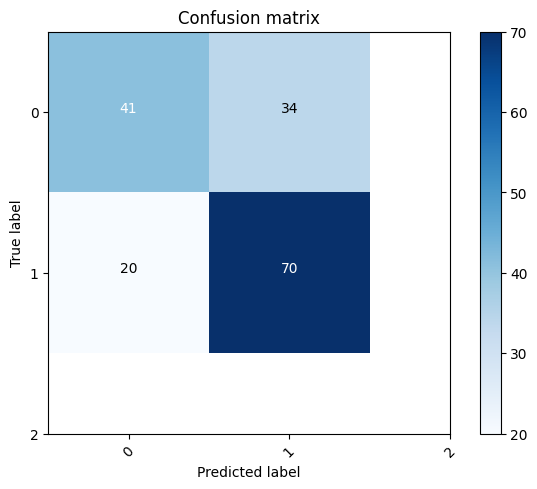

In [60]:
clf = RandomForestClassifier(n_estimators=100)
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)

metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Random Forest",metrics_df,classes = range(3))
dump(clf, 'rf.joblib') 

accuracy is:  0.6424242424242425
Mean Absoulte error 0.35670194003527333
precision score 0.6444444444444444
recall score 0.6432980599647267
classification report
F1 Score 0.6419507889219904
              precision    recall  f1-score   support

           0       0.67      0.60      0.63        84
           1       0.62      0.69      0.65        81

    accuracy                           0.64       165
   macro avg       0.64      0.64      0.64       165
weighted avg       0.64      0.64      0.64       165



['decision.joblib']

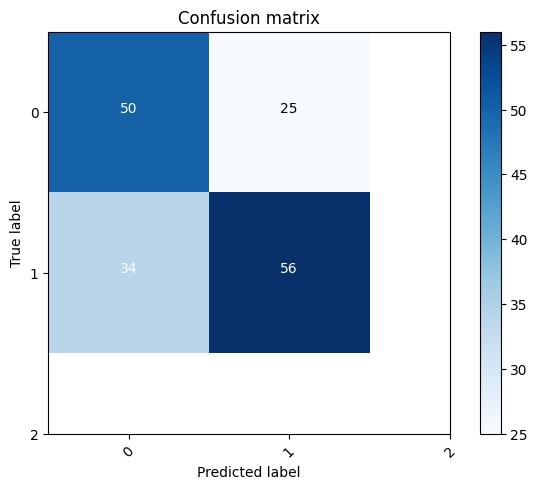

In [61]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Decision Tree",metrics_df,classes = range(3))
dump(clf, 'decision.joblib') 

accuracy is:  0.593939393939394
Mean Absoulte error 0.38660062565172054
precision score 0.5644444444444444
recall score 0.6133993743482795
classification report
F1 Score 0.5271801890423848
              precision    recall  f1-score   support

           0       0.24      0.64      0.35        28
           1       0.89      0.58      0.70       137

    accuracy                           0.59       165
   macro avg       0.56      0.61      0.53       165
weighted avg       0.78      0.59      0.64       165



['GaussianNaiveBayes.joblib']

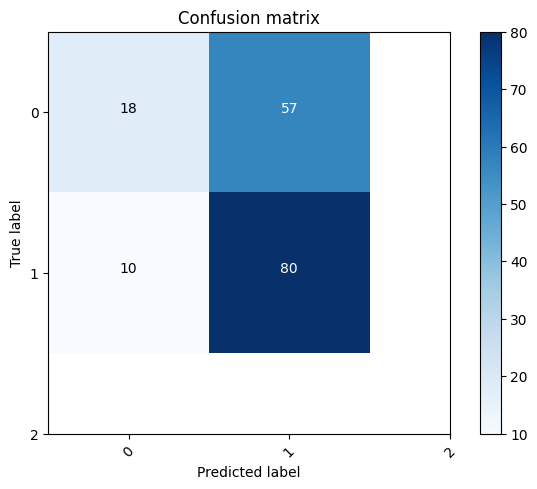

In [62]:
from sklearn.naive_bayes import MultinomialNB
gau = MultinomialNB()
gau = gau.fit(X_train, y_train)
y_pred = gau.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Multi-Nomial Naive Bayes",metrics_df,classes = range(3))
dump(gau, 'GaussianNaiveBayes.joblib') 

accuracy is:  0.6909090909090909
Mean Absoulte error 0.3097153465346535
precision score 0.6822222222222223
recall score 0.6902846534653465
classification report
F1 Score 0.6830389091867866
              precision    recall  f1-score   support

           0       0.59      0.69      0.63        64
           1       0.78      0.69      0.73       101

    accuracy                           0.69       165
   macro avg       0.68      0.69      0.68       165
weighted avg       0.70      0.69      0.69       165



['SVM.joblib']

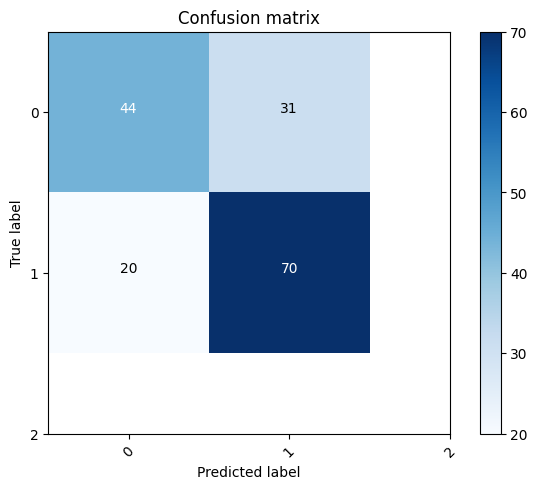

In [63]:
from sklearn.svm import SVC
svm = SVC(max_iter = 1000)
svm = svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"SVC",metrics_df,classes = range(3))
dump(svm, 'SVM.joblib') 

accuracy is:  0.6666666666666666
Mean Absoulte error 0.3320174025136964
precision score 0.6544444444444444
recall score 0.6679825974863036
classification report
F1 Score 0.6536391740773253
              precision    recall  f1-score   support

           0       0.52      0.67      0.59        58
           1       0.79      0.66      0.72       107

    accuracy                           0.67       165
   macro avg       0.65      0.67      0.65       165
weighted avg       0.69      0.67      0.67       165



['LogisticRegression.joblib']

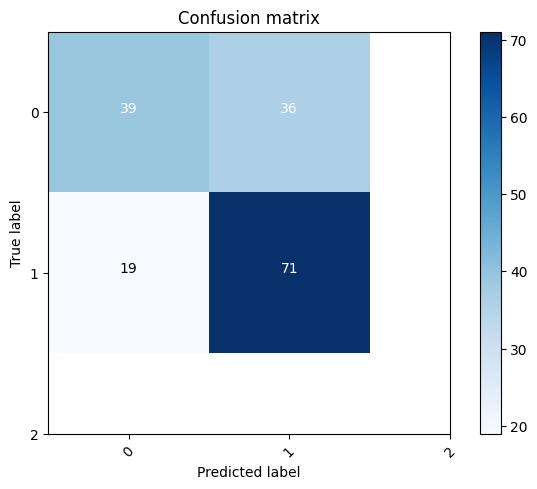

In [64]:
from sklearn.linear_model import LogisticRegression
logi = LogisticRegression(max_iter = 1000)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Logistic Regression",metrics_df,classes = range(3))
dump(logi, 'LogisticRegression.joblib') 

accuracy is:  0.6666666666666666
Mean Absoulte error 0.33585858585858586
precision score 0.6588888888888889
recall score 0.6641414141414141
classification report
F1 Score 0.6594618935044467
              precision    recall  f1-score   support

           0       0.57      0.65      0.61        66
           1       0.74      0.68      0.71        99

    accuracy                           0.67       165
   macro avg       0.66      0.66      0.66       165
weighted avg       0.68      0.67      0.67       165



['XGB.joblib']

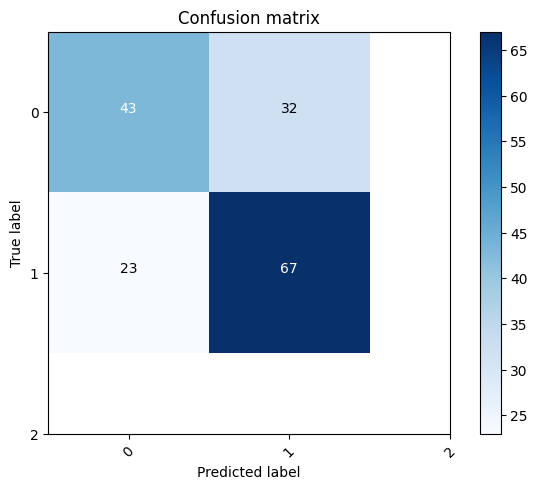

In [66]:
from xgboost import XGBClassifier
logi = XGBClassifier(random_state=42, seed=2, colsample_bytree=0.6, subsample=0.7, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"XGB",metrics_df,classes = range(3))
dump(logi, 'XGB.joblib') 



accuracy is:  0.6787878787878788
Mean Absoulte error 0.3214844973379267
precision score 0.6688888888888889
recall score 0.6785155026620733
classification report
F1 Score 0.6692636435838283
              precision    recall  f1-score   support

           0       0.56      0.68      0.61        62
           1       0.78      0.68      0.73       103

    accuracy                           0.68       165
   macro avg       0.67      0.68      0.67       165
weighted avg       0.70      0.68      0.68       165



['ADA.joblib']

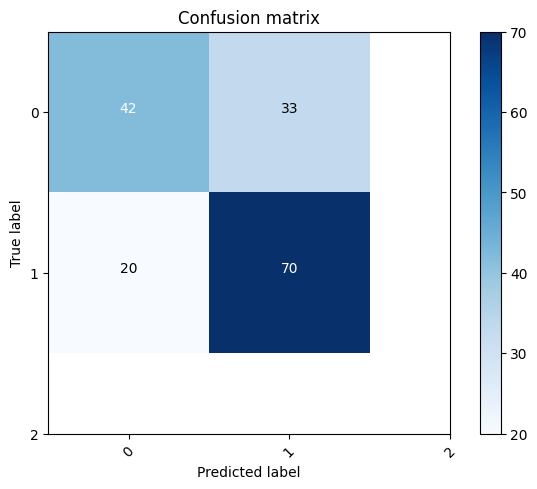

In [67]:
from sklearn.ensemble import  AdaBoostClassifier

logi = AdaBoostClassifier(random_state=42, n_estimators=300)
logi = logi.fit(X_train, y_train)
y_pred = logi.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"ADA",metrics_df,classes = range(3))
dump(logi, 'ADA.joblib') 

In [68]:
metrics_df #opus-mt_ML

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression,XGB,ADA
mae macro average,0.327396,0.356702,0.386601,0.309715,0.332017,0.335859,0.321484
precision macro average,0.662222,0.644444,0.564444,0.682222,0.654444,0.658889,0.668889
recall macro average,0.672604,0.643298,0.613399,0.690285,0.667983,0.664141,0.678516
f1 score marco average,0.662295,0.641951,0.52718,0.683039,0.653639,0.659462,0.669264
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
metrics_df #old-smote

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression
mae macro average,0.249073,0.372106,0.296537,0.267857,0.267136
precision macro average,0.751471,0.628251,0.703715,0.73243,0.730341
recall macro average,0.750927,0.627894,0.703463,0.732143,0.732864
f1 score marco average,0.751082,0.6272,0.701852,0.732258,0.730884
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


# Deep Learning

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.layers import RepeatVector
word_tokenizer = Tokenizer()
word_tokenizer.fit_on_texts(df['tweet'])
y = df['class'].map(int)
X = word_tokenizer.texts_to_sequences(df['tweet'])
print(X)
vocab_length = len(word_tokenizer.word_index) + 1
vocab_length

from keras.utils import pad_sequences 

X = pad_sequences(X, padding='post')


[[314, 107, 32, 1, 21, 15, 156, 5, 1, 2, 14, 35, 9, 46, 3, 1, 6, 25, 33, 26, 6, 20, 7, 41, 229, 32, 84, 28, 3, 1, 2, 4, 6, 17, 7, 54, 47, 1, 56, 30, 1, 11, 41, 246, 1, 36, 88, 1, 91, 256, 52, 12, 18, 6, 1159, 162, 328, 148, 41, 395, 10, 149, 1, 21, 139, 27, 15, 524, 12, 107, 97, 305, 1, 30, 1, 21, 8, 59, 13, 20, 10, 33, 8, 447, 306, 8, 23, 126, 10, 27, 16, 1, 100, 265, 6, 73, 882, 8, 448, 12, 121, 90, 1160, 12, 1161, 730, 8, 1162, 449, 1163, 1, 58, 2, 286, 112, 12, 21, 6, 44, 645, 32, 272, 10, 1, 22, 450, 188, 18, 575, 1], [57, 29, 42, 3, 98, 11, 19, 46, 329, 1164, 42, 3, 69, 11, 17, 226, 3, 1, 67, 25, 33, 41, 229, 32, 84, 28, 3, 1, 24, 13, 175, 61, 5, 1, 21, 15, 38, 5, 1, 36, 88, 1, 57, 4, 172, 15, 38, 5, 1, 4, 14, 10, 74, 1, 95, 45, 154, 132, 1, 6, 13, 20, 1, 185, 13, 20, 8, 883, 186, 3, 1, 36, 9, 91, 126, 8, 345, 10, 27, 149, 2, 27, 207, 12, 107, 8, 307, 57, 29, 70, 230, 884, 26, 122, 98, 6, 21, 2, 6, 67, 25, 2, 6, 24], [6, 25, 2, 6, 24, 107, 10, 75, 21, 8, 102, 12, 2, 67, 25, 44, 2

In [ ]:
vocab_length

1990

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,  random_state = 42)

In [ ]:
X_train.shape

(437, 310)

In [ ]:
y_train.shape

(437,)

In [ ]:
# from imblearn.over_sampling import SMOTE, ADASYN
# X_train, y_train = SMOTE().fit_resample(X_train, y_train)

In [ ]:
import keras as keras
from keras.layers import RepeatVector, Bidirectional,Conv1D,MaxPooling1D
callback = keras.callbacks.ModelCheckpoint(filepath='lstmfinal_2',
                                                 save_weights_only=True,
                                                 verbose=1)


In [ ]:
X_train.shape[1]

310

In [ ]:
model = Sequential()
model.add(Embedding(vocab_length, 500, input_length=X_train.shape[1]) )

model.add(SpatialDropout1D(0.2))
model.add(Conv1D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Bidirectional(LSTM(64,activation = "relu" , dropout=0.2, recurrent_dropout=0.2)))
model.add(RepeatVector(1))
model.add(Bidirectional(LSTM(64,activation = "relu" , dropout=0.2, recurrent_dropout=0.2)))
model.add(RepeatVector(1))

model.add(Bidirectional(LSTM(32,activation = "relu" , dropout=0.2, recurrent_dropout=0.2)))


model.add(Dense(128,activation = "relu"))
model.add(Dense(32,activation = "relu"))





model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
epochs = 25
batch_size = 256
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
2/2 [==============================] - 25s 7s/step - loss: 0.6930 - accuracy: 0.5240 - val_loss: 0.6933 - val_accuracy: 0.4909
Epoch 2/25
2/2 [==============================] - 5s 2s/step - loss: 0.6921 - accuracy: 0.5721 - val_loss: 0.6935 - val_accuracy: 0.4909
Epoch 3/25
2/2 [==============================] - 6s 3s/step - loss: 0.6912 - accuracy: 0.5721 - val_loss: 0.6937 - val_accuracy: 0.4909
Epoch 4/25
2/2 [==============================] - 6s 3s/step - loss: 0.6903 - accuracy: 0.5721 - val_loss: 0.6941 - val_accuracy: 0.4909
Epoch 5/25
2/2 [==============================] - 7s 3s/step - loss: 0.6889 - accuracy: 0.5721 - val_loss: 0.6947 - val_accuracy: 0.4909
Epoch 6/25
2/2 [==============================] - 5s 2s/step - loss: 0.6880 - accuracy: 0.5721 - val_loss: 0.6957 - val_accuracy: 0.4909
Epoch 7/25
2/2 [==============================] - 4s 2s/step - loss: 0.6860 - accuracy: 0.5721 - val_loss: 0.6977 - val_accuracy: 0.4909
Epoch 8/25
2/2 [========================

In [ ]:
# model.save("final_lstm2")

In [ ]:
predict = model.predict(X_test)

4/4 [==============================] - 2s 88ms/step


In [ ]:

# y_t = y_test.map(str)
y_pred = []
for i in predict:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)
CM = confusion_matrix(y_test, y_pred)
print(y_pred)

# metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"Conv BiLSTM",metrics_df,classes = range(3))

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]


LSTM

In [ ]:
model = Sequential()

model.add(Embedding(vocab_length, 500, input_length=X_train.shape[1]) )

model.add(SpatialDropout1D(0.2))

# model.add(LSTM(64,activation = "relu" , dropout=0.2, recurrent_dropout=0.2))
# model.add(RepeatVector(1))
model.add(LSTM(64,activation = "relu" , dropout=0.2, recurrent_dropout=0.2))
model.add(RepeatVector(1))
model.add(LSTM(16,activation = "relu" , dropout=0.2, recurrent_dropout=0.2))

model.add(Dense(128,activation = "relu"))
model.add(Dense(32,activation = "relu"))

model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
epochs = 25
batch_size = 256
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
2/2 [==============================] - 18s 5s/step - loss: 0.6931 - accuracy: 0.5079 - val_loss: 0.6925 - val_accuracy: 0.5333
Epoch 2/25
2/2 [==============================] - 8s 3s/step - loss: 0.6917 - accuracy: 0.5654 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 3/25
2/2 [==============================] - 10s 3s/step - loss: 0.6901 - accuracy: 0.5654 - val_loss: 0.6913 - val_accuracy: 0.5333
Epoch 4/25
2/2 [==============================] - 10s 5s/step - loss: 0.6888 - accuracy: 0.5654 - val_loss: 0.6909 - val_accuracy: 0.5333
Epoch 5/25
2/2 [==============================] - 12s 6s/step - loss: 0.6875 - accuracy: 0.5654 - val_loss: 0.6910 - val_accuracy: 0.5333
Epoch 6/25
2/2 [==============================] - 12s 5s/step - loss: 0.6862 - accuracy: 0.5654 - val_loss: 0.6914 - val_accuracy: 0.5333
Epoch 7/25
2/2 [==============================] - 9s 4s/step - loss: 0.6849 - accuracy: 0.5654 - val_loss: 0.6919 - val_accuracy: 0.5333
Epoch 8/25
2/2 [====================

In [ ]:
predict = model.predict(X_test)

6/6 [==============================] - 1s 115ms/step


In [ ]:
y_pred = []
for i in predict:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
print(y_pred)
print(y_test)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"LSTM Upscaled",metrics_df,classes = range(3))

accuracy is:  0.5279503105590062
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1]
222    0
131    0
149    0
244    1
84     0
      ..
113    0
173    0
286    1
370    1
57     0
Name: class, Length: 161, dtype: int64


ValueError: ignored

BILSTM

In [ ]:
model = Sequential()
model.add(Embedding(vocab_length, 500, input_length=X_train.shape[1]) )


# model.add(Bidirectional(LSTM(128,activation = "relu" , dropout=0.2, recurrent_dropout=0.2)))
# model.add(RepeatVector(1))
model.add(Bidirectional(LSTM(64,activation = "relu" , dropout=0.2, recurrent_dropout=0.2)))
model.add(RepeatVector(1))

model.add(Bidirectional(LSTM(32,activation = "relu" , dropout=0.2, recurrent_dropout=0.2)))


model.add(Dense(128,activation = "relu"))
model.add(Dense(32,activation = "relu"))





model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
# print(model.summary())
epochs = 25
batch_size = 256
history = model.fit(X_train, y_train,validation_data = (X_test,y_test), epochs=epochs, batch_size=batch_size)

Epoch 1/25
2/2 [==============================] - 45s 15s/step - loss: 0.6931 - accuracy: 0.5169 - val_loss: 0.6932 - val_accuracy: 0.4720
Epoch 2/25
2/2 [==============================] - 24s 10s/step - loss: 0.6931 - accuracy: 0.5121 - val_loss: 0.6932 - val_accuracy: 0.4720
Epoch 3/25
2/2 [==============================] - 22s 9s/step - loss: 0.6930 - accuracy: 0.5000 - val_loss: 0.6932 - val_accuracy: 0.4720
Epoch 4/25
2/2 [==============================] - 21s 10s/step - loss: 0.6928 - accuracy: 0.5024 - val_loss: 0.6929 - val_accuracy: 0.4720
Epoch 5/25
2/2 [==============================] - 21s 9s/step - loss: 0.6923 - accuracy: 0.5000 - val_loss: 0.6927 - val_accuracy: 0.4720
Epoch 6/25
2/2 [==============================] - 23s 9s/step - loss: 0.6916 - accuracy: 0.5000 - val_loss: 0.6923 - val_accuracy: 0.4907
Epoch 7/25
2/2 [==============================] - 23s 11s/step - loss: 0.6906 - accuracy: 0.5169 - val_loss: 0.6915 - val_accuracy: 0.5528
Epoch 8/25
2/2 [==============

In [ ]:
predict = model.predict(X_test)

6/6 [==============================] - 2s 224ms/step


accuracy is:  0.5403726708074534
[0 1 1 1 1 1 0 1 0 1 0 1 0 1 1 0 1 1 1 1 1 1 0 1 1 0 0 1 1 1 0 1 1 0 0 1 1
 1 1 1 0 0 1 0 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0
 1 1 0 0 1 1 0 0 1 0 1 0 1 1 1 0 0 0 1 0 1 0 1 1 1 0 0 0 0 0 1 1 0 1 1 1 1
 0 0 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 1 0 0 1 1 0 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 1 1 0 0 1 1 1 1 1 1 1 1]
222    0
131    0
149    0
244    1
84     0
      ..
113    0
173    0
286    1
370    1
57     0
Name: class, Length: 161, dtype: int64
Mean Absoulte error 0.46468028121861404
precision score 0.5326625386996904
recall score 0.5353197187813861
classification report
F1 Score 0.5270720863766275
              precision    recall  f1-score   support

           0       0.39      0.52      0.45        58
           1       0.67      0.55      0.61       103

    accuracy                           0.54       161
   macro avg       0.53      0.54      0.53       161
weighted avg       0.57      0.54      0.55       161



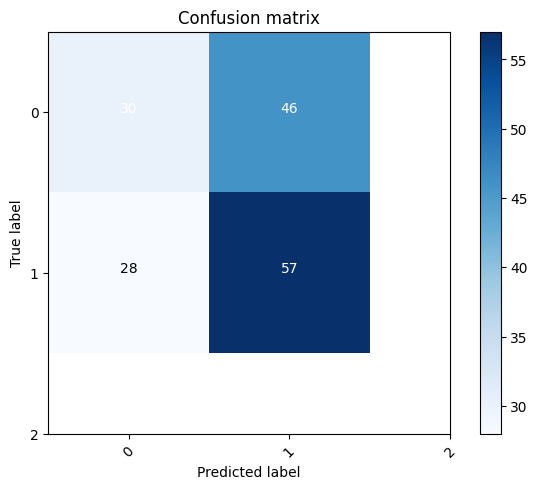

In [ ]:
y_pred = []
for i in predict:
    if i>=0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)
y_pred = np.array(y_pred)
accuracy = accuracy_score(y_test, y_pred)
print("accuracy is: ",accuracy)
CM = confusion_matrix(y_test, y_pred)
print(y_pred)
print(y_test)
metrics_df = plot_confusion_matrix(CM ,y_test, y_pred,"BI LSTM",metrics_df,classes = range(3))

In [ ]:
metrics_df


,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression,Conv BiLSTM,LSTM Upscaled,BI LSTM
mae macro average,0.333059,0.43852,0.410836,0.303406,0.410626,0.391864,0.350461,0.367459
precision macro average,0.548074,0.58199,0.726207,0.528644,0.669064,0.626234,0.631984,0.568734
recall macro average,0.666941,0.56148,0.589164,0.696594,0.589374,0.608136,0.649539,0.632541
f1 score marco average,0.563606,0.568572,0.58958,0.533517,0.604653,0.616008,0.639951,0.585871
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
metrics_df.to_csv('metrics.csv')

In [ ]:
df_result = pd.DataFrame()
df_result['True'] = y_test
df_result['predicted'] = y_pred
df_result['proba'] = predict
df_result = df_result.join(df)

In [ ]:
df_result[(df_result["True"] == 0) & (df_result["predicted"] == 1)]

In [ ]:
df_result[(df_result["True"] == 1) & (df_result["predicted"] == 0)]


In [ ]:
metrics_df

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression,Conv BiLSTM,LSTM,BI LSTM,Conv BiLSTM Upscale
mae macro average,0.31033,0.432688,0.407246,0.307339,0.400239,0.442651,0.431139,0.447015,0.435746
precision macro average,0.555285,0.586539,0.727114,0.531533,0.691268,0.615038,0.650941,0.592327,0.597281
recall macro average,0.68967,0.567312,0.592754,0.692661,0.599761,0.557349,0.568861,0.552985,0.564254
f1 score marco average,0.574492,0.574457,0.597925,0.538447,0.617852,0.561994,0.573484,0.559419,0.57343
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
import pickle 
with open('metric.pkl', 'wb') as file:
    pickle.dump(metrics_df, file)

In [ ]:

import pickle
  
# Open the file in binary mode
with open('metric.pkl', 'rb') as file:
      
    # Call load method to deserialze
    myvar = pickle.load(file)
  
    myvar

In [ ]:
myvar

,Random Forest,Decision Tree,Multi-Nomial Naive Bayes,SVC,Logistic Regression,Conv BiLSTM,LSTM,BI LSTM
mae macro average,0.31033,0.432688,0.407246,0.307339,0.400239,0.442651,0.431139,0.447015
precision macro average,0.555285,0.586539,0.727114,0.531533,0.691268,0.615038,0.650941,0.592327
recall macro average,0.68967,0.567312,0.592754,0.692661,0.599761,0.557349,0.568861,0.552985
f1 score marco average,0.574492,0.574457,0.597925,0.538447,0.617852,0.561994,0.573484,0.559419
classification_report,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...,precision recall f1-score ...


In [ ]:
print(myvar["Random Forest"]["classification_report"])

              precision    recall  f1-score   support

           0       0.99      0.92      0.95      3357
           1       0.12      0.46      0.20        81

    accuracy                           0.91      3438
   macro avg       0.56      0.69      0.57      3438
weighted avg       0.97      0.91      0.94      3438

